In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [3]:
df = pd.read_csv('train.csv')

In [4]:
d = df.ix[:,1].values
d.shape[0]
# dataset.ix[:, 1].values

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


159571

In [2]:
dimension = 32
skip_size = 8
skip_window = 1
num_skips = 2
iteration_train_vectors = 5000

num_layers = 2
size_layer = 256
learning_rate = 0.001
epoch = 10
batch = 30

In [3]:
import numpy as np
import tensorflow as tf
import pandas as pd

import pre_organize_xuwen as po

In [4]:
string, data, label, vocab = po.read_data('train.csv',200)

dictionary, reverse_dictionary, vectors = po.generatevector(dimension, dimension, skip_size, skip_window, num_skips, iteration_train_vectors, string)

there are 200 total rows
data size:  14353
Creating Word2Vec model.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
epoch:  1000 , loss:  10.9379 , speed:  0.002215147018432617
epoch:  2000 , loss:  7.29592 , speed:  0.002783060073852539
epoch:  3000 , loss:  0.0325283 , speed:  0.002132892608642578
epoch:  4000 , loss:  10.1437 , speed:  0.0023488998413085938
epoch:  5000 , loss:  0.621664 , speed:  0.00249481201171875


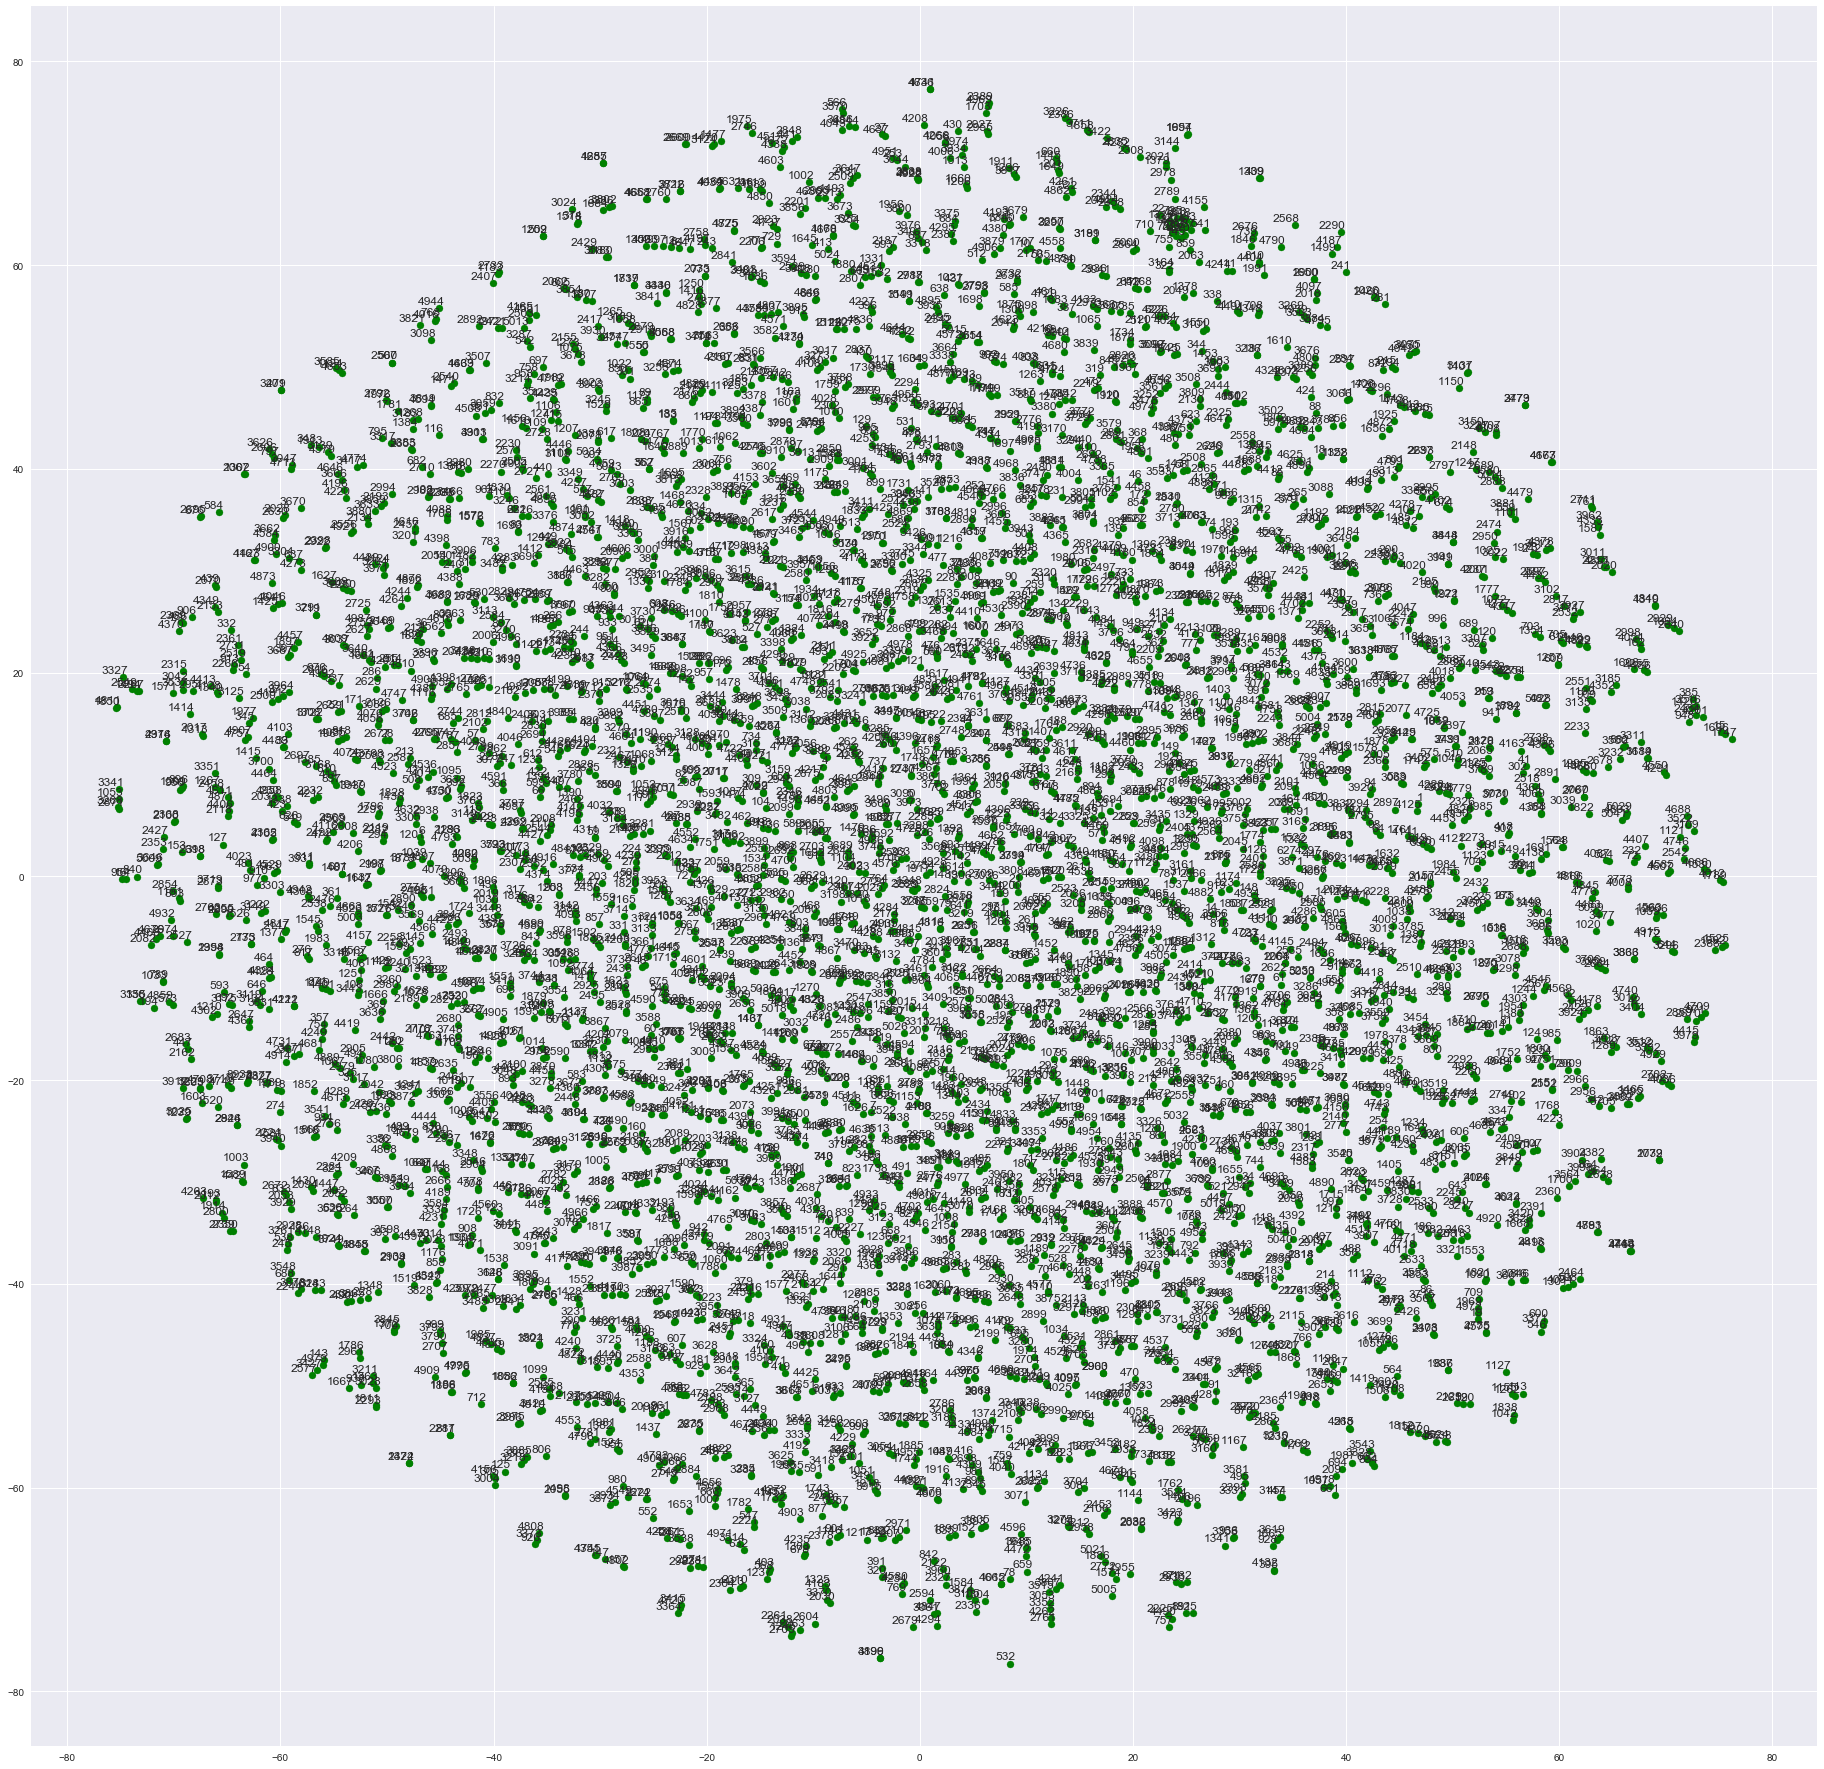

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
sns.set()

embed = TSNE(n_components = 2).fit_transform(vectors)
plt.figure(figsize = (32, 32))

for i, label in enumerate(reverse_dictionary):
    x, y = embed[i, :]
    plt.scatter(x, y, c = 'g')
    plt.annotate(label, xy = (x, y), xytext = (5, 2), textcoords = 'offset points', ha = 'right', va = 'bottom')

plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder().fit_transform(label)
bagofword = np.zeros((len(data), len(vocab)))
for i in range(len(data)):
    for _, text in enumerate(data[i].split()):
        bagofword[i, vocab.index(text)] += 1.0
        
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer

bagofword = Normalizer().fit_transform(bagofword)
data_visual = PCA(n_components = 2).fit_transform(bagofword)
palette = ['r', 'b']
data_label = ['negative', 'positive']

plt.figure(figsize = (18, 18))
for no, _ in enumerate(np.unique(label_encode)):
    plt.scatter(data_visual[label_encode == no, 0], data_visual[label_encode == no, 1], c = palette[no], label = data_label[no], alpha = 0.5)
    
plt.legend()
plt.show()

ValueError: bad input shape ()